<a href="https://colab.research.google.com/github/Ganasa18/belajar-tensorflow/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in Tensorflow

There are many defininitions for a regression prubm but in our case, we'ere going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

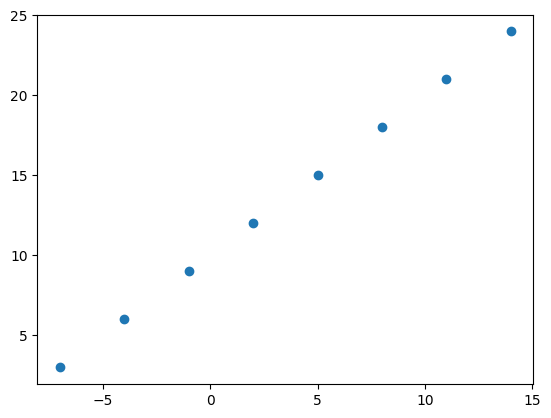

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# # Create features
# X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# # Create labels
# y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [4]:
# X + 10 for to make labels have relationship
# -7 + 10 = 3 | -4 + 10 = 6
y == X + 10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem

# Input Shapes 3
house_info = tf.constant(["bedroom", "bathroom", "garage"])
# Output Shapes 1
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [7]:
X[1], y[1]

(<tf.Tensor: shape=(), dtype=float32, numpy=-4.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [9]:
X[0].ndim

0

In [10]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [11]:
# Turn our NumPy arrays into tensors with dtype
X = tf.constant(X)
y = tf.constant(y)
# X = tf.cast(tf.constant(X), dtype=tf.float32)
# y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

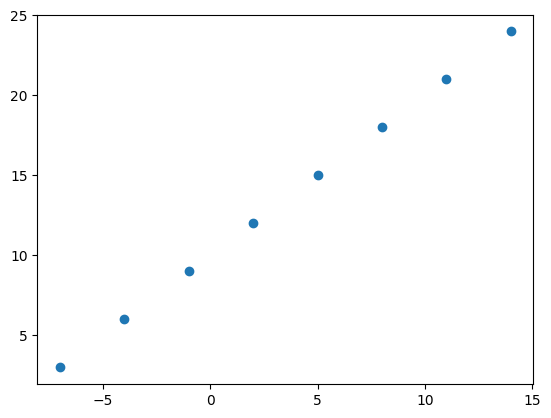

In [13]:
plt.scatter(X, y)

## Steps in modellng with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layes of a deep learning model.

2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)

3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [14]:
# model = tf.keras.Sequential()
# model.add(tf.keras.Input(shape=(16,)))
# model.add(tf.keras.layers.Dense(8))
# ...
# model = tf.kears.Sequential()
# model.add(tf.keras.layers.Dense(1))
# model.add(tf.keras.layers.Dense(1))

In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    # tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error (computes the mean absolute error beetween labels and predictions)
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              # optimizer="sgd",
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 14.2710 - mae: 14.2710
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 14.1385 - mae: 14.1385
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 14.0060 - mae: 14.0060
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 13.8735 - mae: 13.8735
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 13.7410 - mae: 13.7410


In [16]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Try and make a prediction using our model (add 17.0 predict)
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 74ms/step


array([[-0.72001237]], dtype=float32)

## Improving our model

We can improve our mode, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change he optimzization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we mgith fit a model for more epochs (leave it training for longer) or on more data (give the model more examples)

In [18]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fite the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 308ms/step - loss: 19.3036 - mae: 19.3036
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 19.0224 - mae: 19.0224
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 18.7411 - mae: 18.7411
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 18.4599 - mae: 18.4599
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 18.1786 - mae: 18.1786
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 17.8974 - mae: 17.8974
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 17.6161 - mae: 17.6161
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 17.3349 - mae: 17.3349
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 17.0536 - mae: 17.0536
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 16.7724 - mae: 16.7724
Epoch 11/100
1/1 [==============================] - 

In [19]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
# Let's see of our model's prediction has improved..
model.predict([17.0])

1/1 [==============================] - 0s 48ms/step


array([[29.65876]], dtype=float32)

In [21]:
# Let's see if we can make another to improve model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fite the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 809ms/step - loss: 12.3757 - mae: 12.3757
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7295 - mae: 11.7295
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0723 - mae: 11.0723
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4015 - mae: 10.4015
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7145 - mae: 9.7145
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0080 - mae: 9.0080
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2789 - mae: 8.2789
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5243 - mae: 7.5243
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 6.8293 - mae: 6.8293
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.8151 - mae: 6.8151
Epoch 11/100
1/1 [==============================] - 0s 9ms/step -

In [22]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 53ms/step


array([[26.424223]], dtype=float32)

## Evaluting a model

In practice, a typical workflow you'll go through when build neural ntework is :

```
Build a model -> fit it -> evaliate it -> tweak a model -> fit it -> evaluate it -> tewak a model -> fit it -> evaluate it ...
```

When it comes to evaluation.. there are 3 words you should memorize :

> "Visualize, visualize, visualize"
It's good idea to visalize:
* The data - what data are we working with ? What does it look like ?
* The model itself - what does our model look like ?
* The training of a model - how does a model perform whie it learns?
* The prediction of the model - how do the predions of a model line up agains the ground truth (the original labels)?

In [24]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
#  Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

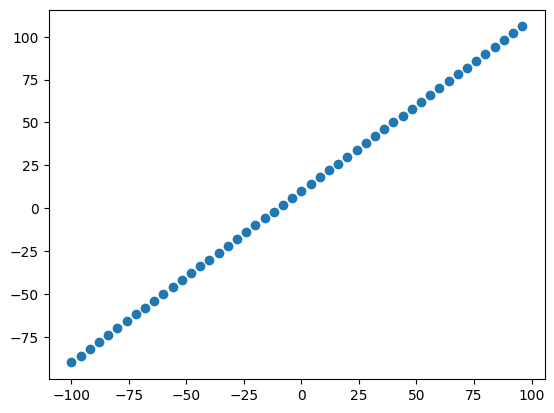

In [26]:
# Visualize the data
import matplotlib.pyplot as plt

# plt.plot(X, y)
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.

* **Validation set** - the model gets tuned on this data, whic is typically 10-15% of the data availbale.

* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.


In [27]:
# Check the length of how many sample we have
len(X)

50

In [28]:
#  Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

# labels
X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now, we've got our data in training and test sets... let's visualize it again!

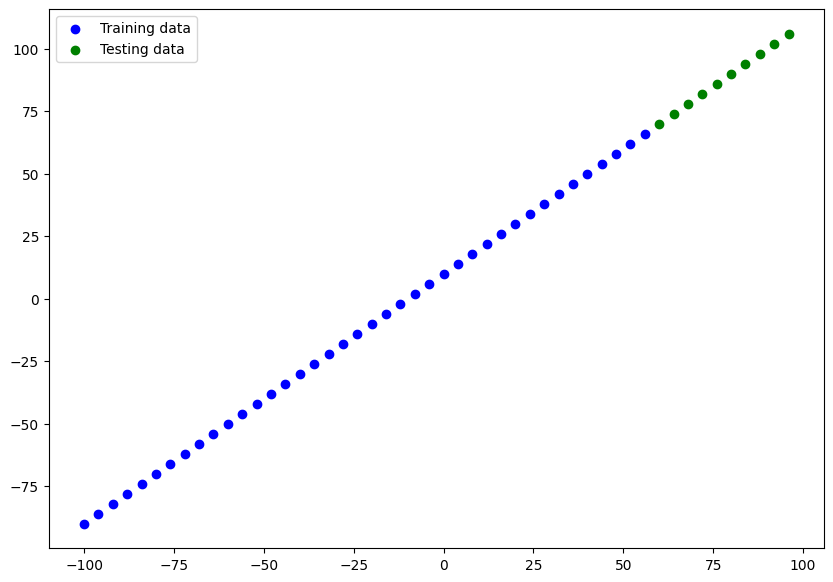

In [29]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [30]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(X_train, y_train epochs=100)

## Visualinzing the model


In [31]:
# model.summary()

In [32]:
# X.shape
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [33]:
# Let's create a model which builds models automatically by defining the shape argument
tf.random.set_seed(42)

# Create a model (same as above)
# Dense = same as fully connected layer
# Fundamentals of neural network Weights and Biases
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # because one input and one output X[0], y[0]
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model. (X and y)
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or paramters from other models during **transfer learning**).



In [35]:
#  Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [36]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


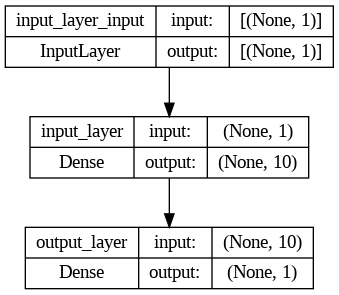

In [37]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's prediction

To visualize predictions it's a good idea to plot them agains the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred (ground truth versus your model;s predictions)


In [38]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 74ms/step


array([[ 69.27248 ],
       [ 73.23352 ],
       [ 77.194565],
       [ 81.15561 ],
       [ 85.11665 ],
       [ 89.0777  ],
       [ 93.038734],
       [ 96.99978 ],
       [100.96083 ],
       [104.92187 ]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** if you feel like you-re going to reuse some kind of functionality in the future, it's a good idea to
turn into a function

In [40]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predicitons=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's preditions in red
  plt.scatter(test_data, predicitons, c="r", label="Predictions")
  # Show the legend
  plt.legend();


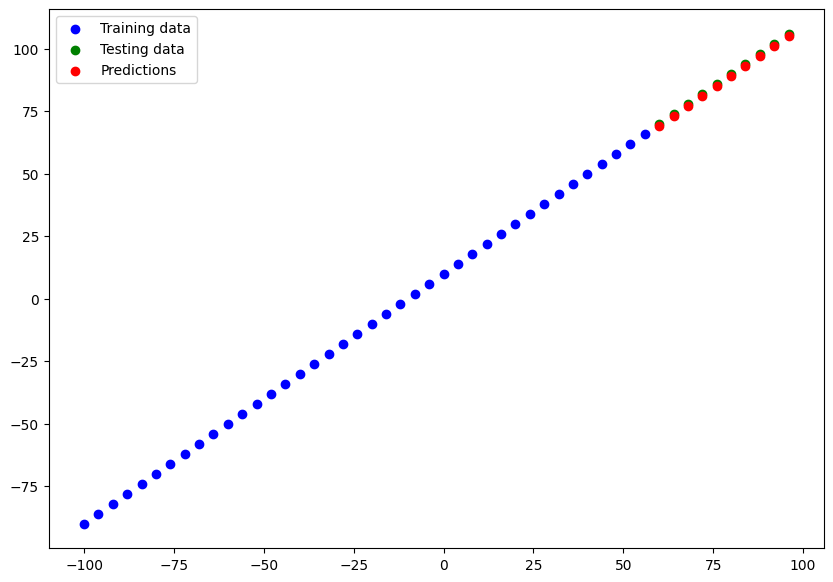

In [41]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predicitons=y_pred)

### Evaluating our model's preditions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model;s preditions"
* MSE - mean square error, "square the average errors"

In [42]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 117ms/step - loss: 0.9028 - mae: 0.9028


[0.9028266668319702, 0.9028266668319702]

In [46]:
# Calculate the maen absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.727524, 15.413183, 12.883261, 11.137756, 10.176669, 10.      ,
       10.607747, 11.999911, 14.176498, 17.137493], dtype=float32)>

In [47]:
# tf.constant to make tensor format
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.27248 ],
       [ 73.23352 ],
       [ 77.194565],
       [ 81.15561 ],
       [ 85.11665 ],
       [ 89.0777  ],
       [ 93.038734],
       [ 96.99978 ],
       [100.96083 ],
       [104.92187 ]], dtype=float32)>

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [48]:
# Remove shape dimension ,1 to make same shape
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.27248 ,  73.23352 ,  77.194565,  81.15561 ,  85.11665 ,
        89.0777  ,  93.038734,  96.99978 , 100.96083 , 104.92187 ],
      dtype=float32)>

In [49]:
# Calcluate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.90282667>

In [51]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.82761633>